In [1]:
#import useful libraries
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import pickle
# Visualizations will be shown in the notebook.
%matplotlib inline

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# verfiy that the number of images in each set matches the number of labels in the same set
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

Number of total images in the original dataset = 51839
Number of total labels in the original dataset = 51839
Minimum number of labels in the original dataset = 270
Maximum number of labels in the original dataset = 3000


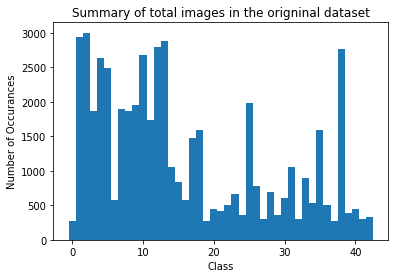

Number of training examples in the original dataset = 34799
Number of validation examples in the original dataset = 4410
Number of testing examples in the original dataset = 12630
Image data shape in the original dataset = (32, 32, 3)
Number of classes in the original dataset = 43


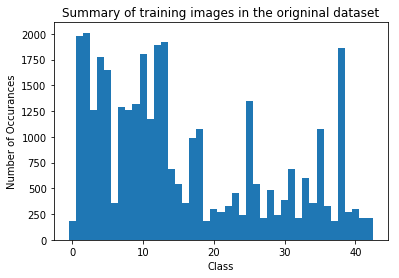

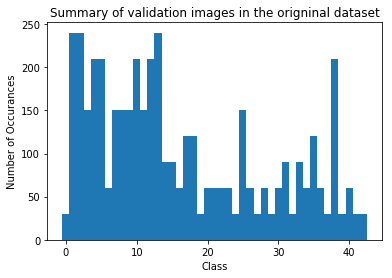

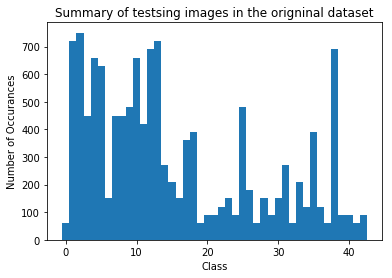

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
X_combined = np.concatenate((X_train, X_valid, X_test), axis=0) # row wise
y_combined = np.concatenate((y_train, y_valid, y_test), axis=0) # row wise

print('Number of total images in the original dataset =', len(X_combined))
print('Number of total labels in the original dataset =', len(y_combined))


### Summary of test data
unique1, counts1 = np.unique(y_combined, return_counts=True)
plt.bar(unique1, counts1, 1)
print('Minimum number of labels in the original dataset =', np.min(counts1))
print('Maximum number of labels in the original dataset =', np.max(counts1))


plt.title('Summary of total images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

## Statistics of the original datasets
n_train = len(X_train)

# number of validation examples
n_validation = len(X_valid)

# number of testing examples.
n_test = len(X_test)

# what's the shape of an traffic sign image?
image_shape = X_train[0].shape

# how many unique classes/labels there are in the dataset.
unique, counts = np.unique(y_train, return_counts=True)
n_classes = len(unique)

print("Number of training examples in the original dataset =", n_train)
print("Number of validation examples in the original dataset =", n_validation)
print("Number of testing examples in the original dataset =", n_test)
print("Image data shape in the original dataset =", image_shape)
print("Number of classes in the original dataset =", n_classes)

### summary of training data
unique2, counts2 = np.unique(y_train, return_counts=True)
plt.bar(unique2, counts2, 1)
plt.title('Summary of training images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of validation data
unique3, counts3 = np.unique(y_valid, return_counts=True)
plt.bar(unique3, counts3, 1)
plt.title('Summary of validation images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of test data
unique4, counts4 = np.unique(y_test, return_counts=True)
plt.bar(unique4, counts4, 1)
plt.title('Summary of testsing images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

In [4]:
# sort and split images by class labels
sorted_indices = np.argsort(y_combined) # find sorted array indices
y_combined_sorted = y_combined[sorted_indices] # apply sorting to y_combined, i.e., sorted labels, e.g., 1 1 2 2 3
X_combined_sorted = X_combined[sorted_indices] 
a = y_combined_sorted[:-1] # all labels except the last label, e.g., 1 1 2 2 
b = y_combined_sorted[1:]  # all labels ecept the first label, e.g., 1 2 2 3
xx = a != b # now check where index-wise elements mis-match, e.g., False True False True
splitter = []
for i in range(len(xx)): # find the indices where labels mis-match, e.g., 1 and 3
    if xx[i] == True:
        splitter.append(i + 1) # add one because np.split(array, [x, y, z]) will split from 0 to x-1, x to y-1, and so on
splitter = np.array(splitter)        
splitted_y_combined = np.array(np.split(y_combined_sorted, splitter))
splitted_X_combined = np.array(np.split(X_combined_sorted, splitter))

In [15]:
#for i in range(0, 43):
#    print(i)
#    plt.figure(figsize = (2,2))
#    plt.imshow(splitted_X_combined[i][0])
#    plt.show()


In [5]:
def affine_transformaiton(image_data_x, image_data_y, angle, scale):
    new_images_x = []
    new_images_y = []
    for image in image_data_x:
        angle = int(random.uniform(-angle, angle))
        transform_mat = cv2.getRotationMatrix2D((image.shape[1]/2, image.shape[0]/2), angle, scale)
        new_images_x.append(cv2.warpAffine(image, transform_mat, (image.shape[1], image.shape[0])))
        new_images_y.append(image_data_y[0])
    
    new_images_x = np.array(new_images_x)
    new_images_y = np.array(new_images_y)
    
    return new_images_x, new_images_y

def flip_horizontally(image_data_x, image_data_y):
    new_images_x = []
    new_images_y = []
    for image in image_data_x:
        new_images_x.append(cv2.flip(image,1)) # to flip horizontally
        new_images_y.append(image_data_y[0])
        
    new_images_x = np.array(new_images_x)
    new_images_y = np.array(new_images_y)
    
    return new_images_x, new_images_y

def flip_vertically(image_data_x, image_data_y):
    new_images_x = []
    new_images_y = []
    for image in image_data_x:
        new_images_x.append(cv2.flip(image,0)) # to flip horizontally
        new_images_y.append(image_data_y[0])
        
    new_images_x = np.array(new_images_x)
    new_images_y = np.array(new_images_y)
    
    return new_images_x, new_images_y

def flip_both_ways(image_data_x, image_data_y):
    new_images_x = []
    new_images_y = []
    for image in image_data_x:
        new_images_x.append(cv2.flip(image,-1)) # to flip horizontally and vertically
        new_images_y.append(image_data_y[0])
        
    new_images_x = np.array(new_images_x)
    new_images_y = np.array(new_images_y)
    
    return new_images_x, new_images_y

def flip_90_anti_clock(image_data_x, image_data_y):
    new_images_x = []
    new_images_y = []
    for image in image_data_x:
        new_images_x.append(cv2.transpose(image)) # 90 degree anticlock-wise rotatio
        new_images_y.append(image_data_y[0])
        
    new_images_x = np.array(new_images_x)
    new_images_y = np.array(new_images_y)
    
    return new_images_x, new_images_y


In [12]:
def generate_image(image_data_x, image_data_y):
    count = len(image_data_x)
    angle1 = 40
    angle2 = 60
    angle3 = 80
    angle4 = 110
    scale1 = 0.40
    scale2 = 0.60
    scale3 = 0.80
    scale4 = 1.0
    # add original data
    new_images_x = image_data_x
    new_images_y = image_data_y
    #print(len(new_images_x),len(new_images_y))
    if count <= 2000:
        # generate fake data with affine transformation
        new_x, new_y = affine_transformaiton(image_data_x, image_data_y, angle1, scale1)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
    
    if count <= 1500:
        # generate fake data with affine transformation
        new_x, new_y = affine_transformaiton(image_data_x, image_data_y, angle2, scale2)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
        
    if count <= 1200:
        # generate fake data with affine transformation
        new_x, new_y = affine_transformaiton(image_data_x, image_data_y, angle3, scale3)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
        
    if count <= 750:
        # generate fake data with affine transformation
        new_x, new_y = affine_transformaiton(image_data_x, image_data_y, angle4, scale4)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
        
        # flip both ways
        new_x, new_y = flip_both_ways(image_data_x, image_data_y)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
        
        # flip horizontally
        new_x, new_y = flip_horizontally(image_data_x, image_data_y)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
    
    if count <= 500:
        
        # flip vertically
        new_x, new_y = flip_vertically(image_data_x, image_data_y)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
        
        # flip 90 degree anti clock-wise
        new_x, new_y = flip_90_anti_clock(image_data_x, image_data_y)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
    
    new_images_x = np.array(new_images_x)
    new_images_y = np.array(new_images_y)
    
    new_images_x, new_images_y = shuffle(new_images_x, new_images_y)
    
    return new_images_x, new_images_y

In [24]:
new_X, new_y = generate_image(splitted_X_combined[0], splitted_y_combined[0])
new_data_X, new_data_y = new_X[:2400], new_y[:2400]
new_X, new_y = generate_image(splitted_X_combined[0], splitted_y_combined[0])
for i in range(1 , n_classes):
    new_X, new_y =  generate_image(splitted_X_combined[i], splitted_y_combined[i])
    new_data_X = np.concatenate((new_data_X, new_X[:2400]), axis=0) # row wise
    new_data_y = np.concatenate((new_data_y,new_y[:2400]), axis=0) # row wise


In [25]:
print(new_data_X.shape)
print(new_data_y.shape)

(103200, 32, 32, 3)
(103200,)


Total number of images in the new dataset = 103200
Number of total images in the newly generated dataset = 103200
Number of total labels in the newly generated dataset = 103200
Minimum number of labels in the newly generated dataset = 103200
Maximum number of labels in the newly generated dataset = 103200


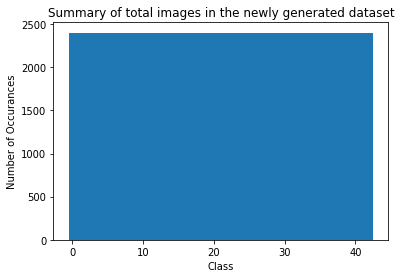

Number of training examples in the newly generated dataset = 61920
Number of validation examples in the newly generated dataset = 20640
Number of testing examples in the newly generated dataset = 20640
Image data shape in the newly generated dataset = (32, 32, 3)
Number of classes in the newly generated dataset = 43


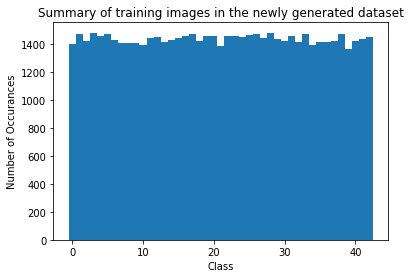

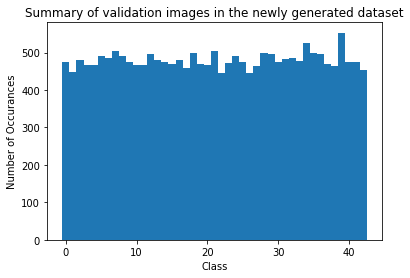

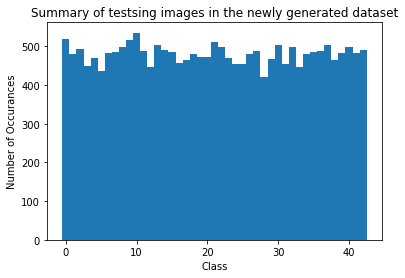

In [26]:
# split data into training, validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_data_X, new_data_y, test_size=0.20, random_state=832289)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=832289)

new_count = len(new_data_y)
new_count = np.array(new_count)
print('Total number of images in the new dataset =', np.sum(new_count))

## statistics of the newly generated data
print('Number of total images in the newly generated dataset =', len(new_data_X))
print('Number of total labels in the newly generated dataset =', len(new_data_y))
print('Minimum number of labels in the newly generated dataset =', np.min(new_count))
print('Maximum number of labels in the newly generated dataset =', np.max(new_count))
### Summary of test data
unique1, counts1 = np.unique(new_data_y, return_counts=True)
plt.bar(unique1, counts1, 1)
plt.title('Summary of total images in the newly generated dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

## Statistics of the newly generated datasets
n_train = len(X_train)

# number of validation examples
n_validation = len(X_valid)

# number of testing examples.
n_test = len(X_test)

# what's the shape of an traffic sign image?
image_shape = X_train[0].shape

# how many unique classes/labels there are in the dataset.
unique, counts = np.unique(y_train, return_counts=True)
n_classes = len(unique)

print("Number of training examples in the newly generated dataset =", n_train)
print("Number of validation examples in the newly generated dataset =", n_validation)
print("Number of testing examples in the newly generated dataset =", n_test)
print("Image data shape in the newly generated dataset =", image_shape)
print("Number of classes in the newly generated dataset =", n_classes)

### summary of training data
unique2, counts2 = np.unique(y_train, return_counts=True)
plt.bar(unique2, counts2, 1)
plt.title('Summary of training images in the newly generated dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of validation data
unique3, counts3 = np.unique(y_valid, return_counts=True)
plt.bar(unique3, counts3, 1)
plt.title('Summary of validation images in the newly generated dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of test data
unique4, counts4 = np.unique(y_test, return_counts=True)
plt.bar(unique4, counts4, 1)
plt.title('Summary of testsing images in the newly generated dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

In [27]:
# Save new training the data for easy access
pickle_file = '../data/new_train_data.p'
if not os.path.isfile(pickle_file):
    print('Saving new training data to pickle file...')
    try:
        with open('../data/new_train_data.p', 'wb') as pfile: # 'wb' is write binary
            pickle.dump(
                {
                    'X_train': X_train,
                    'y_train': y_train,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Data cached in pickle file.


In [28]:
# Save new validation data for easy access
pickle_file = '../data/new_valid_data.p'
if not os.path.isfile(pickle_file):
    print('Saving new valdiation data to pickle file...')
    try:
        with open('../data/new_valid_data.p', 'wb') as pfile: # 'wb' is write binary
            pickle.dump(
                {
                    'X_valid': X_valid,
                    'y_valid': y_valid,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Data cached in pickle file.


In [29]:
# Save new tet data for easy access
pickle_file = '../data/new_test_data.p'
if not os.path.isfile(pickle_file):
    print('Saving new testing data to pickle file...')
    try:
        with open('../data/new_test_data.p', 'wb') as pfile: # 'wb' is write binary
            pickle.dump(
                {
                    'X_test': X_test,
                    'y_test': y_test,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Data cached in pickle file.
